# Credit Card Fraud Detection

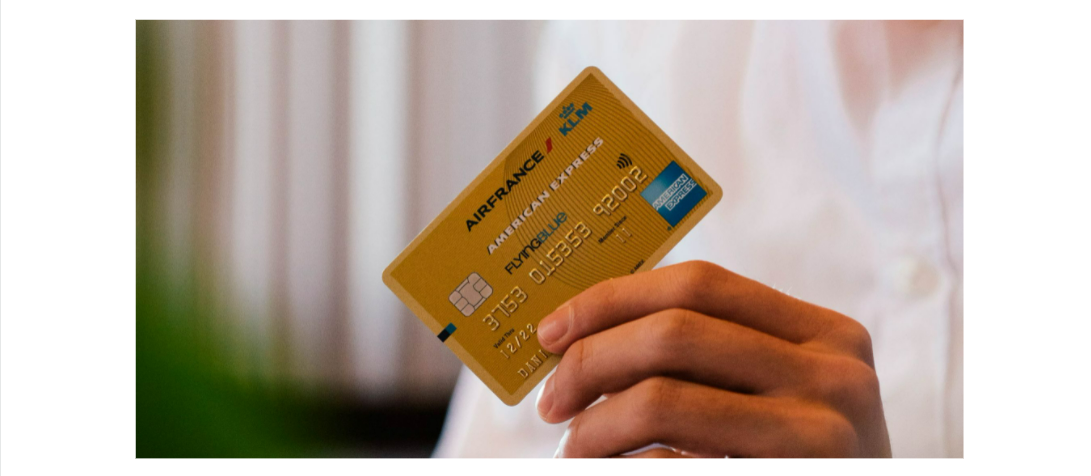



In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

# Variables and Paths

In [1]:
DATA_PATH = r"C:\Users\ChiGa\Desktop\PGD Capstone\creditcard data\creditcard.csv"

# Importing libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import preprocessing

## Exploratory Data Analysis

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
print('Number of Records : {}\nNumber of Columns : {}'.format(df.shape[0],df.shape[1]))

Number of Records : 284807
Number of Columns : 31


In [5]:
#observe the different feature type present in the data
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in any of the columns in the dataset

In [8]:
# Class has to be a categorical variable
df['Class'] = df['Class'].astype(object)

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [10]:
classes=df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

There are 284315 Non-Fraud cases while only 492 Fraud cases in the dataset

In [11]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

df_class = df['Class'].value_counts().to_frame('Count')
df_class.index = ['Non Fraud','Fraud']
df_class['Count'] = df_class['Count']/df.shape[0]
fig = px.bar(df_class, x=df_class.index, y="Count", color="Count", title="Long-Form Input")
fig.show()

### Distribution of classes with time

<AxesSubplot:xlabel='Class', ylabel='Time'>

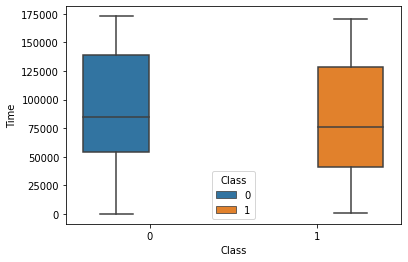

In [12]:
# Create a scatter plot to observe the distribution of classes with time
sns.boxplot(x=df['Class'], y=df['Time'], hue=df['Class'])


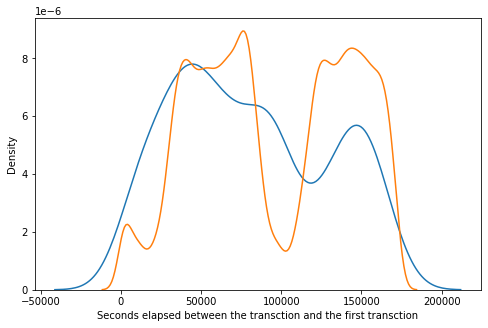

In [13]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

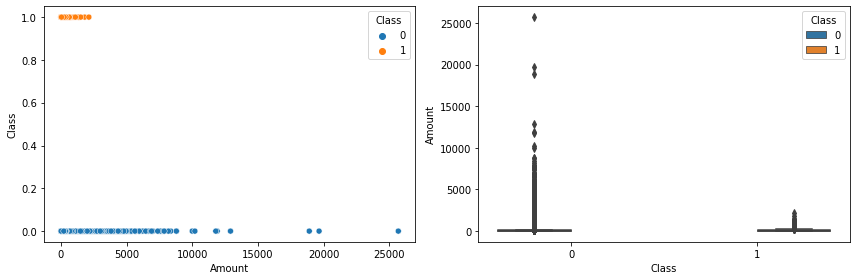

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(y=df['Class'], x=df['Amount'], hue=df['Class'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Class'], y=df['Amount'], hue=df['Class'])
plt.tight_layout()

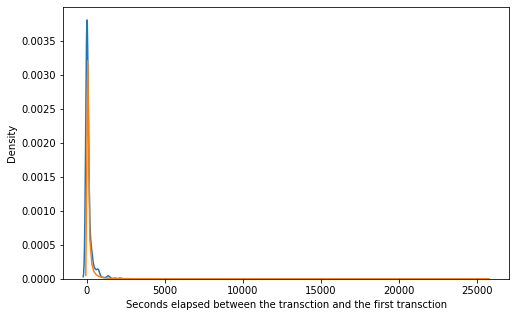

In [15]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Amount'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [16]:
cols = df.columns
cols = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
len(cols)

29

In [17]:
#Creating a plot function
def distPlot(num_cols,df):
  plt.figure(figsize=[30,20])
  for col in num_cols:
    a=num_cols.index(col)+1
    plt.subplot(10,3,a)
    sns.distplot(df[col]).set(title='Dist plot for '+col, xlabel=col)
  plt.tight_layout(pad=2.0)
  plt.show()

In [18]:
# distPlot(cols,df)

We are not considering outlier treatment as all the columns are already PCA transformed, which assumes that the outlier values are taken care while transforming the data.

<Figure size 2160x2160 with 0 Axes>

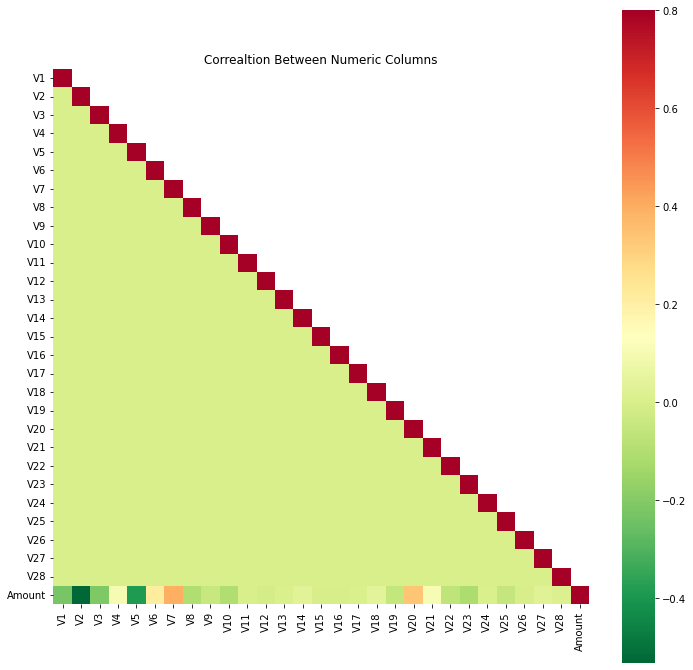

In [19]:
plt.figure(figsize=[30,30])
corr_mat = df[cols].corr()
corr_mat_mask = np.array(corr_mat)
# Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[12,12])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.8, square=True, annot=False, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

There is no strong correlation amongst the features, hence no multicollinearity

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [20]:
# Drop unnecessary columns
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Plotting the distribution of a variable

In [21]:
# plot the histogram of a variable from the dataset to see the skewness
#distPlot(cols,df)

# Train-Test Split

### Splitting the data into train & test data

In [22]:
y = df['Class']
X = df.drop('Class',axis=1)

In [23]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

y_train, y_test = y_train.astype(int), y_test.astype(int)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [24]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
340
152


## Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [25]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])


# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [26]:
_trans_col = X_train.columns

#= ['Time', 'V1', 'V4','V5', 'V6', 'V10',
#       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [27]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
df_transformed = df.copy()

from sklearn.preprocessing import PowerTransformer

trans_cols = _trans_col

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)


_X_train_transformed = pt.fit_transform(X_train[trans_cols])
_X_test_transformed = pt.fit_transform(X_test[trans_cols])

_df_xtrain_transformed = pd.DataFrame(_X_train_transformed)
_df_xtest_transformed = pd.DataFrame(_X_test_transformed)

In [28]:
_df_xtrain_transformed.columns = _trans_col

In [29]:
print(list(trans_cols))

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [31]:
# plot the histogram of a variable from the dataset again to see the result 

#df_trans
#sns.distplot(df_trans['time']).set(title='Dist plot for '+col, xlabel=col)
#plt.tight_layout(pad=2.0)
#plt.show()

# distPlot(list(trans_cols),_df_xtrain_transformed)

# Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [73]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic:\n\n')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
# Creating a function to print model summary
def model_summary(model,X,y,train_test):
    print("===="*25)
    print("----"*9+" Performance on "+str(train_test)+" "+"------"*7)
    y_pred = model.predict(X)
    print("===="*25)
    # Confusion matrix
    confusion = metrics.confusion_matrix(y, y_pred)
    print("Confusion Matrix:\n\n",confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("-----"*20)
    # Accuracy
    print("Accuracy: ",metrics.accuracy_score(y, y_pred))
    print("-----"*20)
    # Sensitivity
    print("Sensitivity: ",TP / float(TP+FN))
    print("-----"*20)
    # Specificity
    print("Specificity: ", TN / float(TN+FP))
    print("-----"*20)
    # F1 score
    print("F1-Score: ", f1_score(y, y_pred))
    print("-----"*20)
    # classification_report
    print(classification_report(y, y_pred))
    print("-----"*20)
    # Predicted probability
    y_pred_proba = model.predict_proba(X)[:,1]
    # Plot the ROC curve
    draw_roc(y, y_pred_proba)
    print("====="*20)

    return None

In [33]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
#num_C = [0.01, 0.1, 1]  #--> list of values
#Logreg = linear_model.LogisticRegression()
cv_num =  5

In [34]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [35]:
from sklearn.model_selection import GridSearchCV

# Specify params
params = {"C": [0.01, 0.1, 1]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train.astype(int))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [36]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.499078      0.016018         0.015523        0.002224    0.01   
1       0.918485      0.082561         0.012746        0.003719     0.1   
2       1.312566      0.074433         0.012854        0.004022       1   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989464           0.990470           0.966770   
1   {'C': 0.1}           0.981491           0.983960           0.964886   
2     {'C': 1}           0.975055           0.979645           0.961157   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.980834  ...         0.982476        0.008576                1   
1           0.975915  ...         0.978379        0.007507                2   
2           0.975146  ...         0.975278        0.008009                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.982861            0.982023            0.987915   
1            0.980535            0.977457            0.985819   
2            0.978299            0.974919            0.984335   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.984517            0.984216          0.984306         0.002019  
1            0.983844            0.981768          0.981885         0.002855  
2            0.982286            0.979907          0.979949         0.003247  

[3 rows x 21 columns]

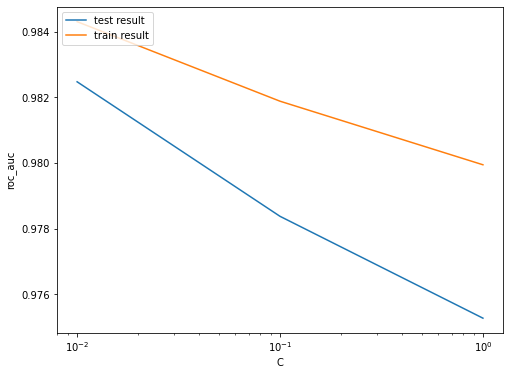

In [37]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [40]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9824756695655346 at C = 0.01


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

# Optimal Logistic Model with Imbalanced Data

In [86]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[198996     28]
 [   146    194]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9991272245741458
----------------------------------------------------------------------------------------------------
Sensitivity:  0.5705882352941176
----------------------------------------------------------------------------------------------------
Specificity:  0.9998593134496342
----------------------------------------------------------------------------------------------------
F1-Score:  0.6903914590747331
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199024
           1       0.87      0.57      0.69       340

    accuracy                           1.00    19

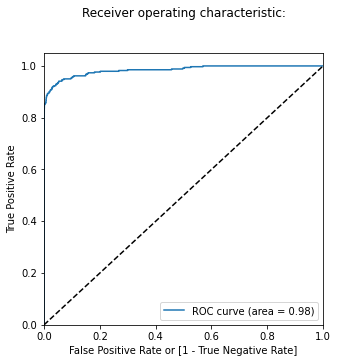

In [87]:
#Prediction on the train set
model_summary(logistic_imb_model, X_train, y_train,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85283     8]
 [   59    93]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9992158515033414
----------------------------------------------------------------------------------------------------
Sensitivity:  0.6118421052631579
----------------------------------------------------------------------------------------------------
Specificity:  0.9999062034681268
----------------------------------------------------------------------------------------------------
F1-Score:  0.7351778656126482
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.92      0.61      0.74       152

    accuracy                           1.00     85443


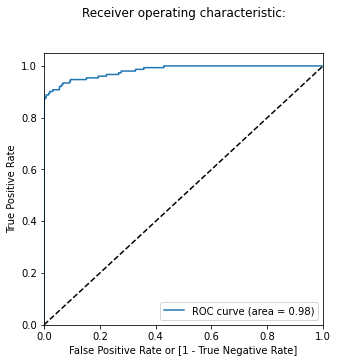

In [84]:
#Prediction on the test set
model_summary(logistic_imb_model, X_test, y_test,"Test")

ROC on the test set

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

#### Model summary

##### Train set

Accuracy = 0.99

Sensitivity = 0.70

Specificity = 0.99

F1-Score = 0.76

ROC = 0.99

##### Test set
Accuracy = 0.99
Sensitivity = 0.77
Specificity = 0.99
F1-Score = 0.65
ROC = 0.97
Overall, the model is performing well in the test set, what it had learnt from the train set.

## XGBoost with Imbalanced Data

In [128]:
#pip install xgboost

In [90]:
# Importing XGBoost

from xgboost import XGBClassifier

# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[20:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:44:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:44:29]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [91]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.668986      0.438154         0.040186        0.007017   
1      13.023567      0.178507         0.052521        0.001711   
2      17.880179      0.443619         0.062375        0.004894   
3      11.083334      0.639513         0.072630        0.017104   
4      15.757404      0.680993         0.060643        0.002146   
5      18.409762      0.914287         0.062327        0.005475   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.979007   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.986672   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.984023   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.982312   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.979513   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.977449   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.968220           0.979496         0.975574        0.005204   
1           0.969156           0.979236         0.978355        0.007178   
2           0.970582           0.983277         0.979294        0.006168   
3           0.967036           0.965022         0.971457        0.007720   
4           0.961642           0.983178         0.974778        0.009408   
5           0.962785           0.981607         0.973947        0.008073   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.999865            0.999860   
1                2            0.999969            0.999993   
2                1            0.999970            0.999991   
3                6            0.999996            0.999957   
4                4            1.000000            1.000000   
5                5            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999395          0.999707         0.000221  
1            0.999953          0.999971         0.000016  
2            0.999954          0.999972         0.000015  
3            0.999985          0.999979         0.000016  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

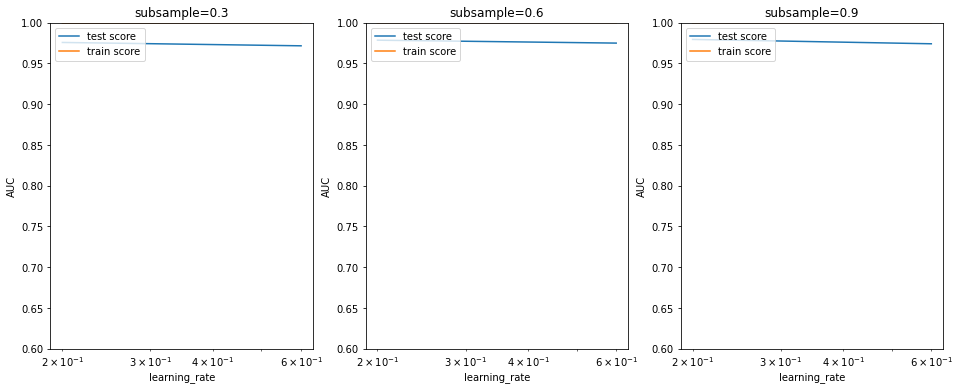

In [92]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters

In [93]:
print(model_cv.best_params_)

# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

{'learning_rate': 0.2, 'subsample': 0.9}
[21:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Prediction on the train set

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[199024      0]
 [     0    340]]
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  1.0
----------------------------------------------------------------------------------------------------
F1-Score:  1.0
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199024
           1       1.00      1.00      1.00       340

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
w

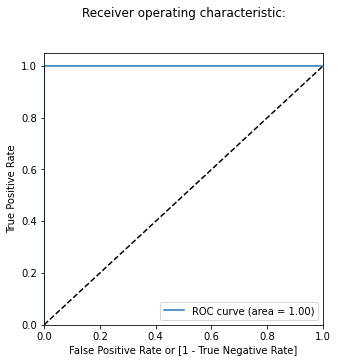

In [94]:
#Prediction on the train set
model_summary(xgb_imb_model, X_train, y_train,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85288     3]
 [   32   120]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9995903701883126
----------------------------------------------------------------------------------------------------
Sensitivity:  0.7894736842105263
----------------------------------------------------------------------------------------------------
Specificity:  0.9999648263005475
----------------------------------------------------------------------------------------------------
F1-Score:  0.8727272727272727
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.98      0.79      0.87       152

    accuracy                           1.00     85443


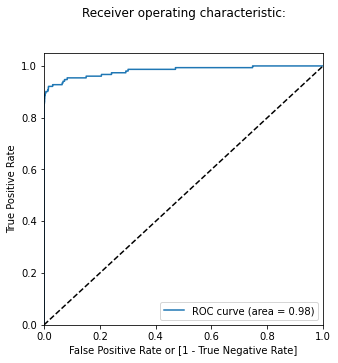

In [96]:
#Prediction on the test set
model_summary(xgb_imb_model, X_test, y_test,"Test")

#### Model summary

##### Train set
Accuracy = 0.99
Sensitivity = 0.85
Specificity = 0.99
ROC-AUC = 0.99
F1-Score = 0.90
##### Test set
Accuracy = 0.99
Sensitivity = 0.75
Specificity = 0.99
ROC-AUC = 0.98
F-Score = 0.79
Overall, the model is performing well in the test set, what it had learnt from the train set.

# Random Forest with Imbalanced Data

In [135]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,250], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


KeyboardInterrupt: 

In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

# Fit the model
rfc_imb_model.fit(X_train, y_train)

In [ ]:
y_train_pred_RFC = RFC.predict(X_train)
class_report = classification_report(y_train_pred_RFC, y_train)

conf_mat = confusion_matrix(y_train_pred_RFC, y_train)
print(class_report)
conf_mat

In [ ]:
#params = {'n_estimators':[100,200], 'min_samples_leaf':[50,100],'max_depth':[20,30],'criterion':['gini', 'entropy']}

#GS  = GridSearchCV(RFC, param_grid = params)

#GS.fit(X_train,y_train)

#print(GS.best_estimator_)
#print(GS.best_score)
#print(GS.best_params)

In [ ]:
RFC.get_params().keys()

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = xgb_imb_model  #initialise the model with optimum hyperparameters
#clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_train_pred_RFC = clf.predict(X_train)
#class_report = classification_report(y_test_pred_RFC, y_test)
print(len(y_train_pred_RFC))
print(len(y_train))
conf_mat = confusion_matrix(y_train,y_train_pred_RFC)
#print(class_report)
conf_mat

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Handling Class Imbalance

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [98]:
#pip install imblearn

In [99]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [100]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 199024, 1: 340})
New class distribution:- Counter({0: 199024, 1: 199024})


## Logistic Regression with Balanced data (Random Oversampling)

In [101]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [102]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.571159      0.138401         0.018716        0.006264    0.01   
1       1.961401      0.102130         0.016372        0.004850     0.1   
2       1.952571      0.150989         0.015624        0.000065       1   
3       1.808693      0.219771         0.018751        0.006252      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988283           0.987963           0.987951   
1   {'C': 0.1}           0.988587           0.988251           0.988243   
2     {'C': 1}           0.988627           0.988294           0.988284   
3    {'C': 10}           0.988632           0.988298           0.988287   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.988188  ...         0.988169        0.000193                4   
1           0.988492  ...         0.988462        0.000192                3   
2           0.988539  ...         0.988505        0.000193                2   
3           0.988543  ...         0.988510        0.000194                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.988207            0.988233            0.988251   
1            0.988509            0.988518            0.988553   
2            0.988554            0.988562            0.988596   
3            0.988558            0.988566            0.988601   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.988175            0.988094          0.988192         0.000055  
1            0.988454            0.988376          0.988482         0.000062  
2            0.988495            0.988418          0.988525         0.000063  
3            0.988498            0.988422          0.988529         0.000063  

[4 rows x 21 columns]

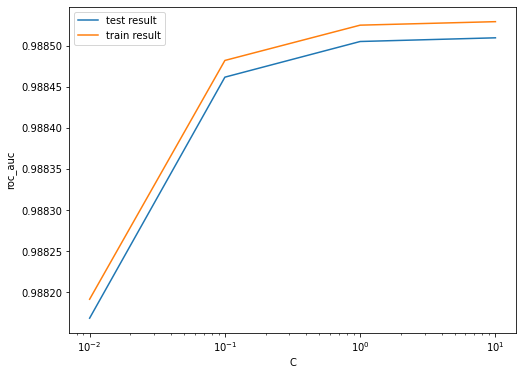

In [103]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [104]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885095490086886 at C = 10


## Logistic regression with optimal C

In [105]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[194364   4660]
 [ 14187 184837]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9526514390224294
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9287171396414503
----------------------------------------------------------------------------------------------------
Specificity:  0.9765857384034087
----------------------------------------------------------------------------------------------------
F1-Score:  0.9514903956285503
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    199024
           1       0.98      0.93      0.95    199024

    accuracy                           0.95    39

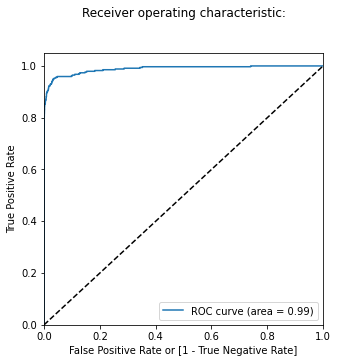

In [106]:
#Prediction on the train set
model_summary(logistic_bal_ros, X_train_ros, y_train_ros,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[83269  2022]
 [   15   137]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9761595449597977
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9013157894736842
----------------------------------------------------------------------------------------------------
Specificity:  0.9762929265690401
----------------------------------------------------------------------------------------------------
F1-Score:  0.11856339247079187
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85291
           1       0.06      0.90      0.12       152

    accuracy                           0.98     85443

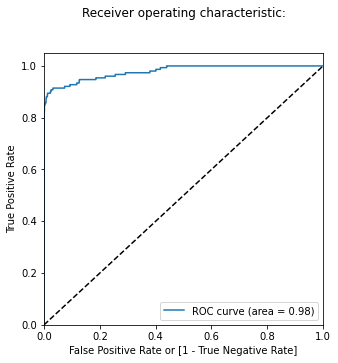

In [108]:
#Prediction on the test set
model_summary(logistic_bal_ros, X_test, y_test,"Test")

## XGBoost with Balanced data (Random Oversampling)

In [110]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)      

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[21:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:30]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [111]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.916709      1.848973         0.084042        0.019957   
1      21.008639      0.746927         0.100285        0.006700   
2      28.382293      2.046009         0.124472        0.005014   
3      22.003788      0.794959         0.133062        0.012894   
4      26.246529      0.085776         0.128794        0.016651   
5      29.856783      0.366607         0.128885        0.005424   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999903   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999917   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999904   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999985   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999984   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999988   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999878           0.999947         0.999909        0.000028   
1           0.999904           0.999952         0.999924        0.000020   
2           0.999891           0.999950         0.999915        0.000025   
3           0.999951           0.999991         0.999976        0.000017   
4           0.999952           0.999997         0.999978        0.000019   
5           0.999958           0.999999         0.999982        0.000017   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.999928            0.999937   
1                4            0.999933            0.999946   
2                5            0.999929            0.999939   
3                3            1.000000            1.000000   
4                2            1.000000            1.000000   
5                1            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999917          0.999927         0.000009  
1            0.999921          0.999933         0.000010  
2            0.999920          0.999929         0.000008  
3            0.999996          0.999998         0.000002  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

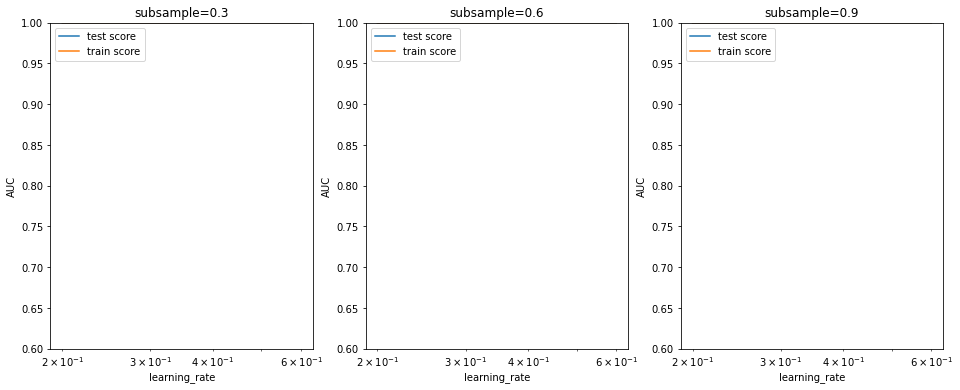

In [112]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [113]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [114]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[21:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[199024      0]
 [     0 199024]]
----------------------------------------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  1.0
----------------------------------------------------------------------------------------------------
F1-Score:  1.0
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199024
           1       1.00      1.00      1.00    199024

    accuracy                           1.00    398048
   macro avg       1.00      1.00      1.00    398048
w

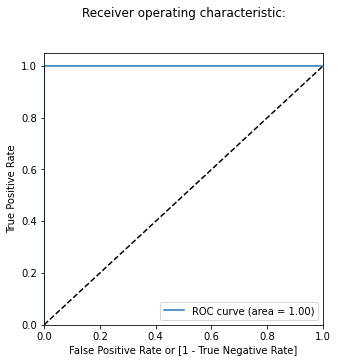

In [115]:
#Prediction on the train set
model_summary(xgb_bal_ros_model, X_train_ros, y_train_ros,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85279    12]
 [   26   126]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9995552590615966
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8289473684210527
----------------------------------------------------------------------------------------------------
Specificity:  0.9998593052021901
----------------------------------------------------------------------------------------------------
F1-Score:  0.8689655172413793
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.91      0.83      0.87       152

    accuracy                           1.00     85443


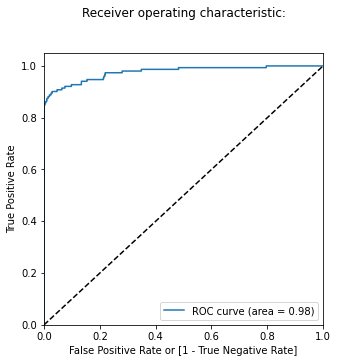

In [117]:
#Prediction on the test set
model_summary(xgb_bal_ros_model, X_test, y_test,"Test")

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

## SMOTE (Synthetic Minority Oversampling Technique)

In [119]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 199024, 1: 340})
New class distribution:- Counter({0: 199024, 1: 199024})


# Logistic Regression with Balanced Data (SMOTE)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.501578      0.050800         0.018214        0.003401    0.01   
1       1.825791      0.098173         0.020169        0.006185     0.1   
2       1.843091      0.092478         0.025018        0.007631       1   
3       1.850801      0.191107         0.015623        0.000065      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.990363           0.990176           0.990471   
1   {'C': 0.1}           0.990624           0.990461           0.990755   
2     {'C': 1}           0.990674           0.990518           0.990810   
3    {'C': 10}           0.990681           0.990524           0.990816   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.990449  ...         0.990282        0.000196                4   
1           0.990723  ...     

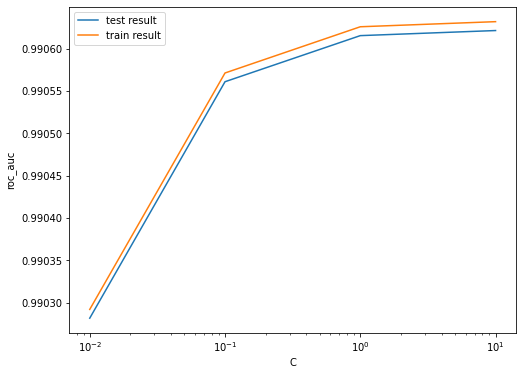

 The highest test roc_auc is 0.990621340220706 at C = 10


In [122]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10]}

X = X_train_smote
y = y_train_smote

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X, y)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.show()



# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

## Logistic regression with optimal C

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[193950   5074]
 [ 13045 185979]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9544803641771846
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9344551410885119
----------------------------------------------------------------------------------------------------
Specificity:  0.9745055872658573
----------------------------------------------------------------------------------------------------
F1-Score:  0.9535501964996653
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96    199024
           1       0.97      0.93      0.95    199024

    accuracy                           0.95    39

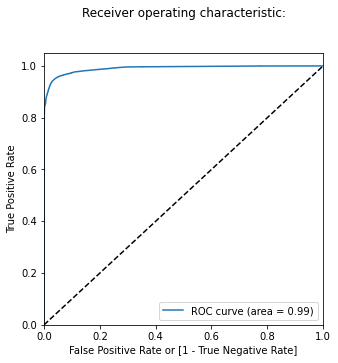

In [124]:
#Prediction on the train set

model = LogisticRegression(C=0.1)

X = X_train_smote
y = y_train_smote


model.fit(X,y)
model_summary(model, X_train_smote, y_train_smote,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[83117  2174]
 [   14   138]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9743922849150896
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9078947368421053
----------------------------------------------------------------------------------------------------
Specificity:  0.9745107924634486
----------------------------------------------------------------------------------------------------
F1-Score:  0.11201298701298701
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85291
           1       0.06      0.91      0.11       152

    accuracy                           0.97     85443

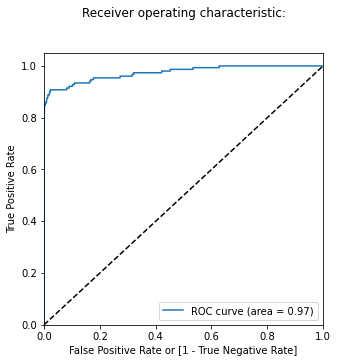

In [127]:
#Prediction on the test set
model_summary(model, X_test, y_test,"Test")

## XGBoost on SMOTE

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[21:30:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:16]

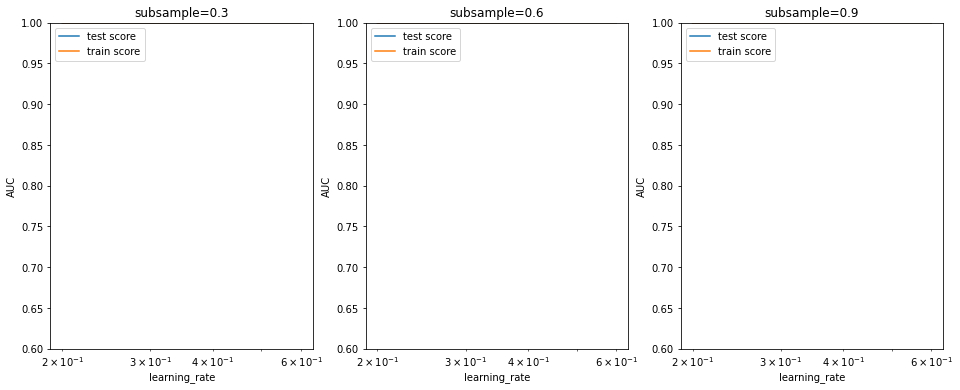

In [129]:
# Specify params
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}

X = X_train_smote
y = y_train_smote

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X, y)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


print(model_cv.best_params_)

In [130]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

[21:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[199023      1]
 [     0 199024]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.999997487740172
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  0.9999949754803441
----------------------------------------------------------------------------------------------------
F1-Score:  0.9999974877464836
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199024
           1       1.00      1.00      1.00    199024

    accuracy                           1.00    398048
   macro av

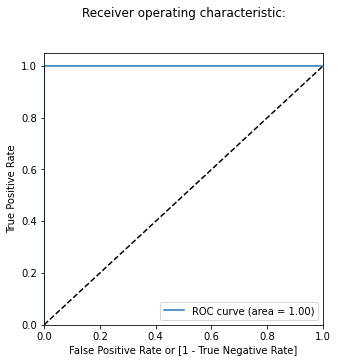

In [131]:
#Prediction on the train set
model_summary(xgb_bal_smote_model, X_train_smote, y_train_smote,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85256    35]
 [   24   128]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9993094811745842
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8421052631578947
----------------------------------------------------------------------------------------------------
Specificity:  0.9995896401730546
----------------------------------------------------------------------------------------------------
F1-Score:  0.8126984126984127
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.79      0.84      0.81       152

    accuracy                           1.00     85443


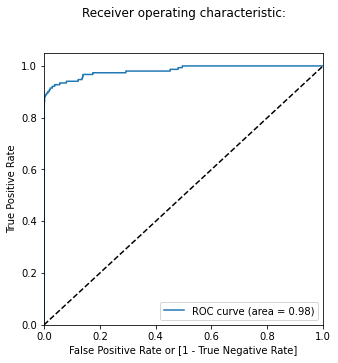

In [133]:
#Prediction on the test set
model_summary(xgb_bal_smote_model, X_test, y_test,"Test")

# Below Cell has some issue at line 25

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

# AdaSyn (Adaptive Synthetic Sampling)

In [135]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 199024, 1: 340})
New class distribution:- Counter({1: 199051, 0: 199024})


# Logistic Regression with ADASYN

Fitting 5 folds for each of 5 candidates, totalling 25 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.872707      0.063228         0.016079        0.000602    0.01   
1       2.121659      0.133274         0.021996        0.007806     0.1   
2       2.176980      0.103372         0.016618        0.001905       1   
3       2.318721      0.178038         0.022213        0.007423      10   
4       2.112429      0.213013         0.018769        0.006242     100   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.961817           0.952973           0.949519   
1   {'C': 0.1}           0.963333           0.954401           0.951006   
2     {'C': 1}           0.963779           0.954660           0.951245   
3    {'C': 10}           0.963831           0.954685           0.951268   
4   {'C': 100}           0.963836           0.954689           0.951272   

   split3_test_score  ...  mean_test_s

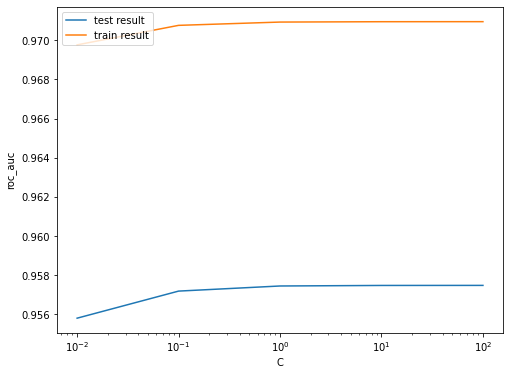

 The highest test roc_auc is 0.9574856058931174 at C = 100


In [136]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100]}

X = X_train_adasyn
y = y_train_adasyn

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X, y)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.show()



# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

In [137]:
# Logistic regression with optimal C

# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[183123  15901]
 [ 21511 177540]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9060177102304842
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8919322183761951
----------------------------------------------------------------------------------------------------
Specificity:  0.9201051129512019
----------------------------------------------------------------------------------------------------
F1-Score:  0.9046808597372686
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91    199024
           1       0.92      0.89      0.90    199051

    accuracy                           0.91    39

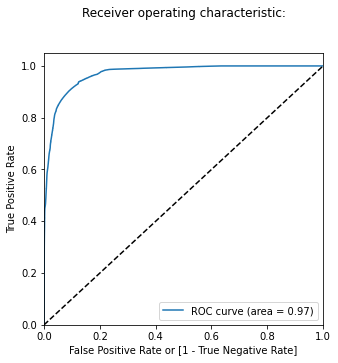

In [138]:
#Prediction on the train set
model_summary(logistic_bal_adasyn_model, X_train_adasyn, y_train_adasyn,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[78360  6931]
 [   13   139]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.918729445361235
----------------------------------------------------------------------------------------------------
Sensitivity:  0.9144736842105263
----------------------------------------------------------------------------------------------------
Specificity:  0.9187370296983269
----------------------------------------------------------------------------------------------------
F1-Score:  0.03849349210744946
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85291
           1       0.02      0.91      0.04       152

    accuracy                           0.92     85443


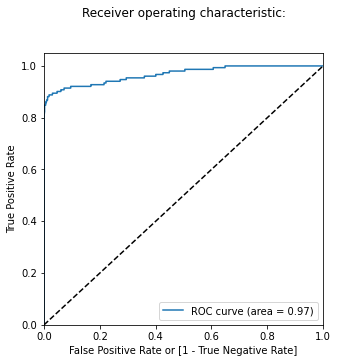

In [140]:
#Prediction on the test set
model_summary(logistic_bal_adasyn_model, X_test, y_test,"Test")

# XGBoost with ADASYN

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[21:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:53]

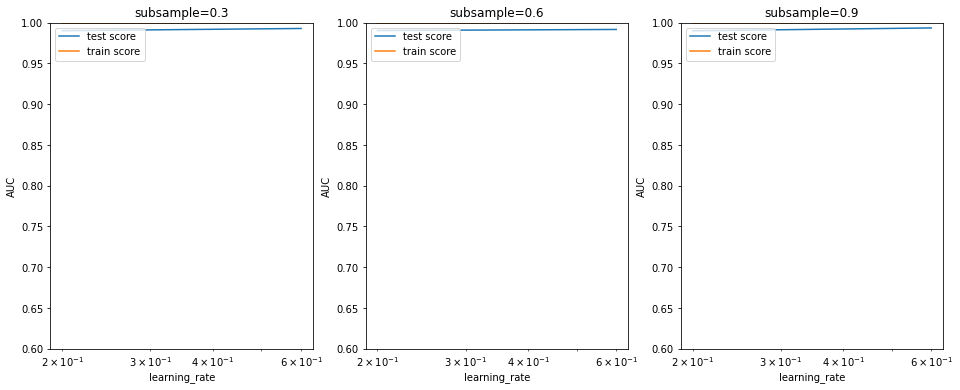

In [142]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn) 

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log') 
    
    
    
print(model_cv.best_params_)

In [146]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

[22:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

------------------------------------ Performance on Train ------------------------------------------
Confusion Matrix:

 [[199022      2]
 [     0 199051]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.9999949758211393
----------------------------------------------------------------------------------------------------
Sensitivity:  1.0
----------------------------------------------------------------------------------------------------
Specificity:  0.9999899509606882
----------------------------------------------------------------------------------------------------
F1-Score:  0.999994976187127
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199024
           1       1.00      1.00      1.00    199051

    accuracy                           1.00    398075
   macro av

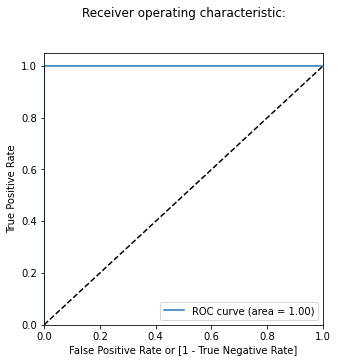

In [150]:
#Prediction on the train set
model_summary(xgb_bal_adasyn_model, X_train_adasyn, y_train_adasyn,"Train")

------------------------------------ Performance on Test ------------------------------------------
Confusion Matrix:

 [[85244    47]
 [   24   128]]
----------------------------------------------------------------------------------------------------
Accuracy:  0.99916903666772
----------------------------------------------------------------------------------------------------
Sensitivity:  0.8421052631578947
----------------------------------------------------------------------------------------------------
Specificity:  0.9994489453752448
----------------------------------------------------------------------------------------------------
F1-Score:  0.7828746177370031
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.73      0.84      0.78       152

    accuracy                           1.00     85443
  

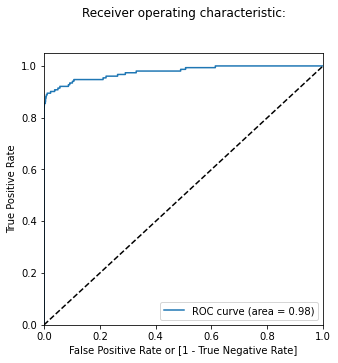

In [151]:
#Prediction on the test set
model_summary(xgb_bal_adasyn_model, X_test, y_test,"Test")

### Print the class distribution after applying ADASYN

AttributeError: 'int' object has no attribute 'values'

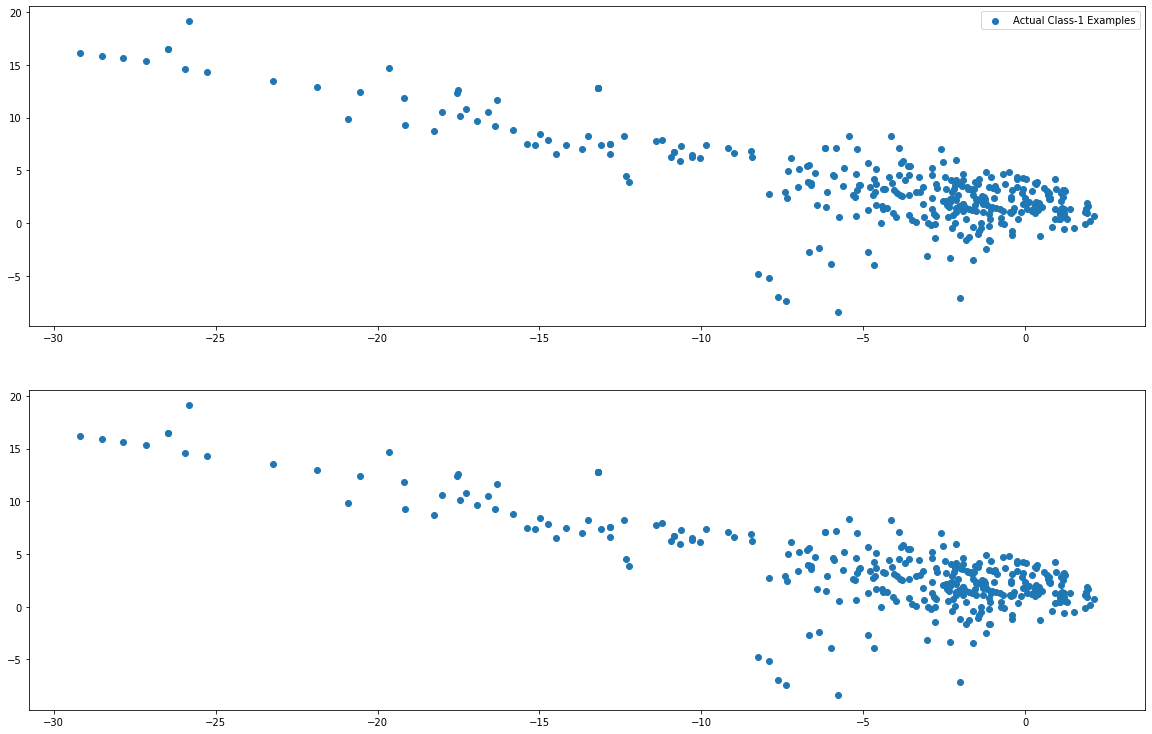

In [149]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0].values, 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = xgb_bal_adasyn_model  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn) # fit on the balanced dataset
#print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

y_train_adasyn_pred_RFC = clf.predict(X_train_adasyn)
#class_report = classification_report(y_test_pred_RFC, y_test)
#print(len(y_train_pred_RFC))
#print(len(y_train_adasyn))
conf_mat = confusion_matrix(y_train_adasyn,y_train_adasyn_pred_RFC)
#print(class_report)
conf_mat

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

# Choosing best model on the balanced data

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic regression model with SMOTE is the best model for its simlicity and less resource requirement.

# Summary to the business

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.